# Lead Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


In [2]:
lead=pd.read_csv('D:/task/Leads.csv')
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking total rows and cols in dataset
lead.shape

(9240, 37)

In [4]:
#basic data check
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#check for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
#check for duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

Data Cleaning

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

In [10]:
#checking null values in each rows

lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#dropping cols with more than 45% missing values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)

In [13]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
#checking value counts of Country column

lead['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
South Africa               4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Ghana                      2
China                      2
Uganda                     2
Philippines                2
Belgium                    2
Tanzania                   1
Sri Lanka                  1
Denmark                    1
Indonesia                  1
Malaysia                   1
Liberia       

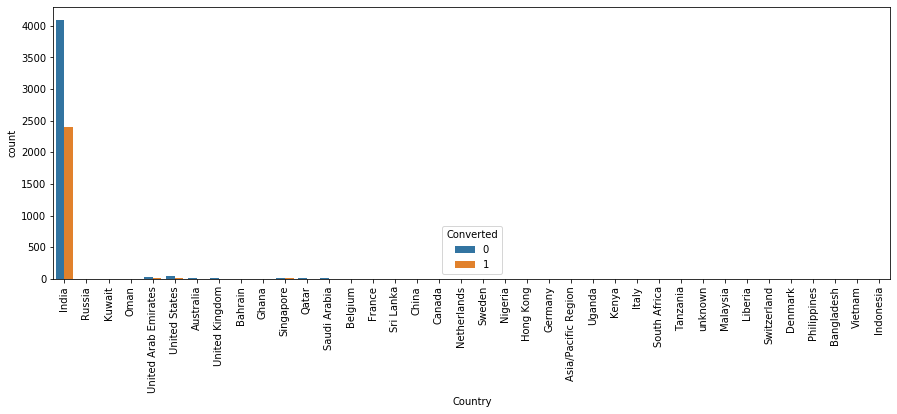

In [15]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s=sns.countplot(lead.Country, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [16]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

lead['Country'] = lead['Country'].replace(np.nan,'India')

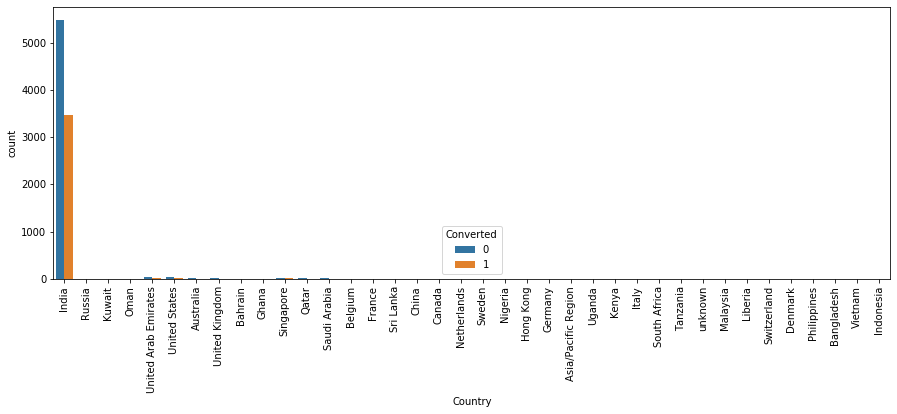

In [17]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s=sns.countplot(lead.Country, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [18]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [19]:
#checking value counts of "City" column

lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

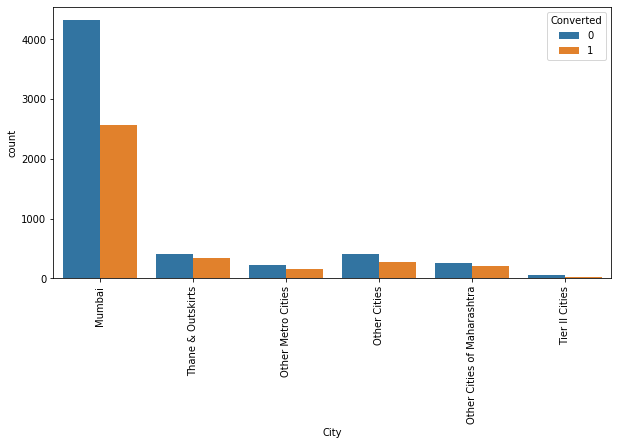

In [21]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s=sns.countplot(lead.City, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [22]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

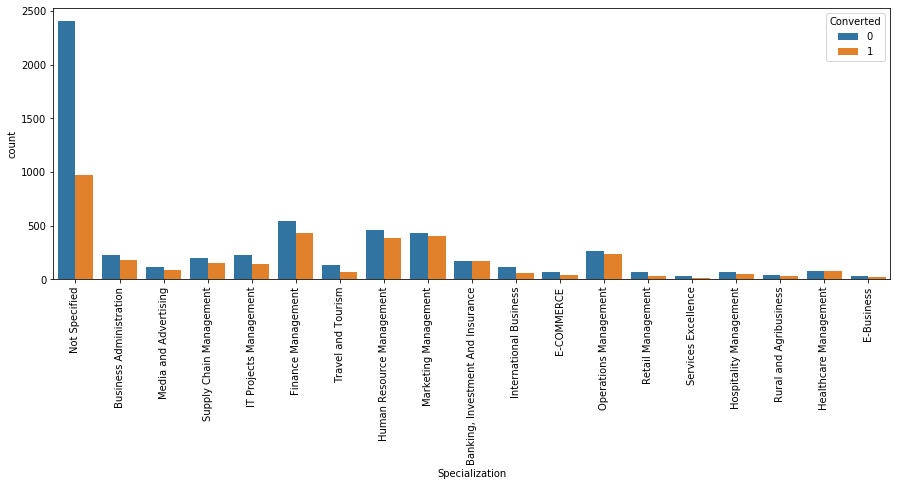

In [24]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s=sns.countplot(lead.Specialization, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  


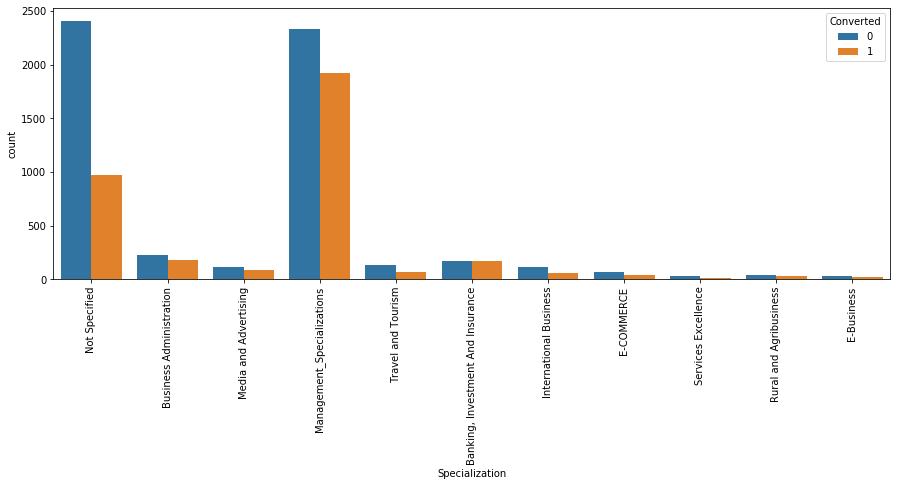

In [26]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s=sns.countplot(lead.Specialization, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


In [27]:
#What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
#checking count of values
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

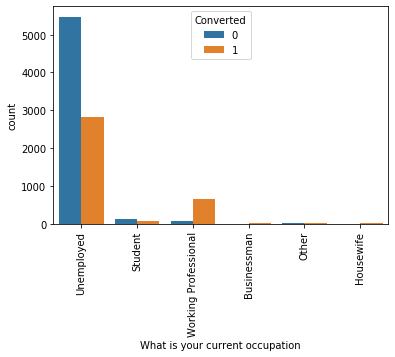

In [30]:
#visualizing count of Variable based on Converted value

s=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [31]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

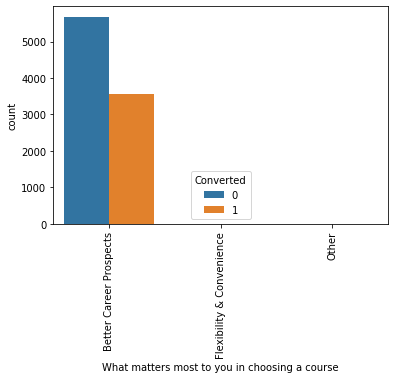

In [33]:
s=sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


In [34]:
#checking value counts of variable
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [36]:
#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
#replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')


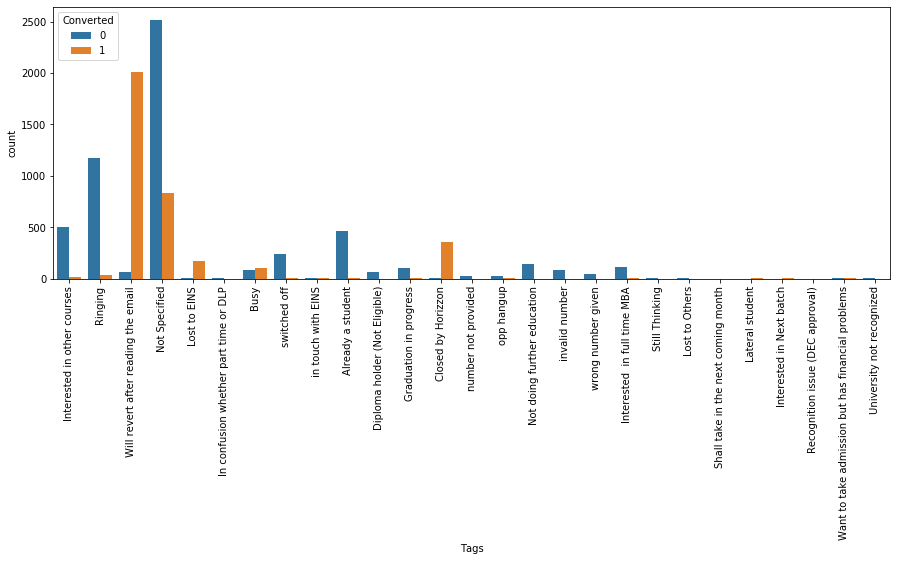

In [38]:
plt.figure(figsize=(15,5))
s=sns.countplot(lead['Tags'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [40]:
#checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [41]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
testone                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
#replacing Nan Values and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

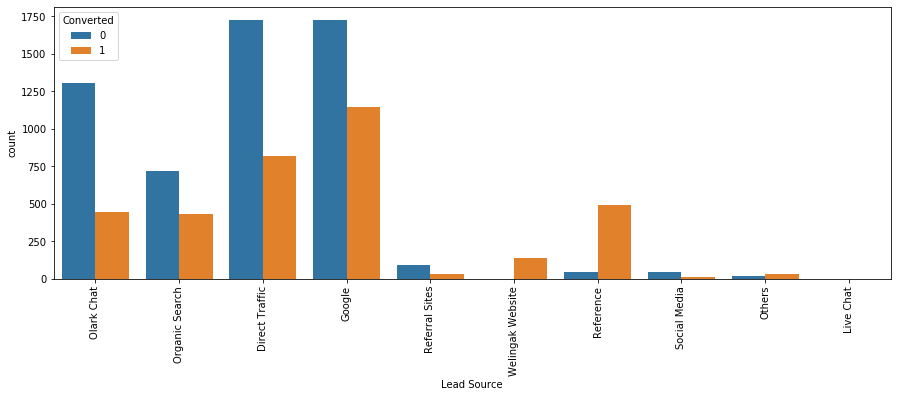

In [43]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s=sns.countplot(lead['Lead Source'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
#replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [46]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [47]:
#Check the Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [48]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead = lead.dropna()

In [49]:
#Checking percentage of Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [50]:
#Lead Origin
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

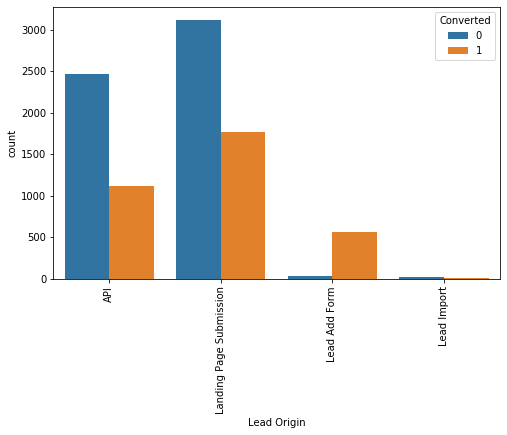

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

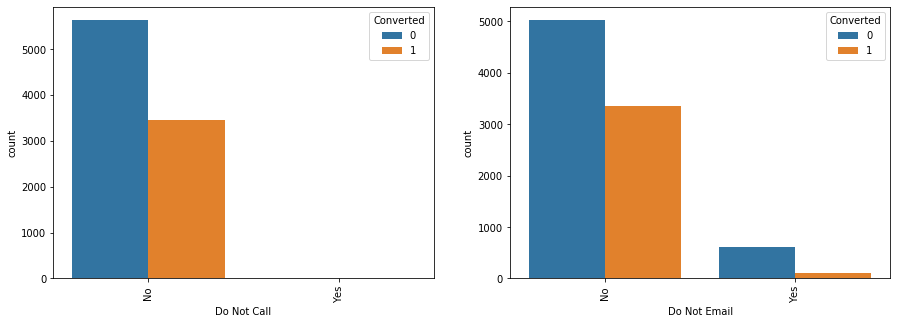

In [52]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead['Do Not Call'], hue=lead.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead['Do Not Email'], hue=lead.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()


In [53]:
#checking value counts for Do Not Call
lead['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [54]:
#checking value counts for Do Not Email
lead['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [55]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [56]:
lead.Search.value_counts(dropna=False)


No     9089
Yes      14
Name: Search, dtype: int64

In [57]:
lead.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [58]:
lead['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [59]:
lead['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
lead['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [61]:
lead['Digital Advertisement'].value_counts(dropna=False)


No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [62]:
lead['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
lead['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [64]:
lead['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [65]:
lead['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [66]:
lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [67]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [68]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])


In [69]:
#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [70]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')


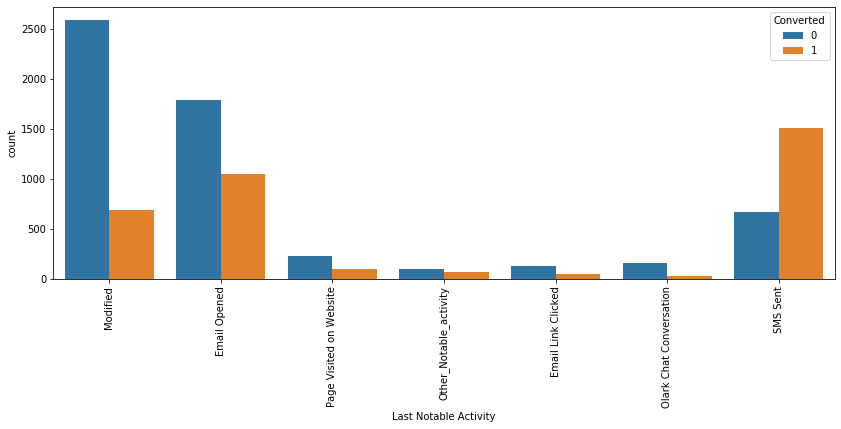

In [71]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [72]:
#checking value counts for variable

lead['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [73]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [74]:
#dropping columns
lead = lead.drop(cols_to_drop,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
Tags                                      9103 non-null object
City                                      9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
Last Notable Activity                     9103 non-null object
dtypes: flo

Numerical Attributes

In [75]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted


38.02043282434362

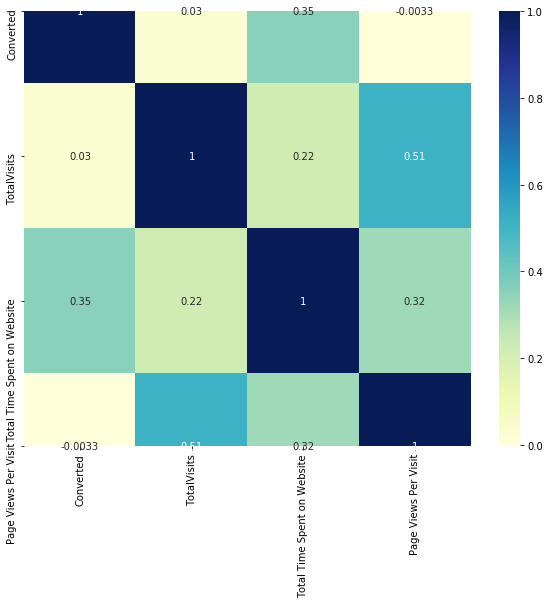

In [76]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

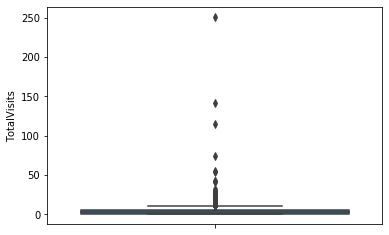

In [77]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()


In [78]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

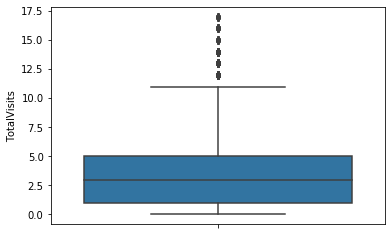

In [79]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [80]:
lead.shape

(9020, 14)

In [81]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

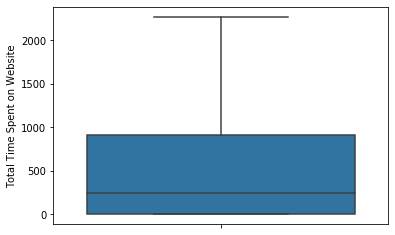

In [82]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

In [83]:
#checking spread of "Page Views Per Visit"

lead['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

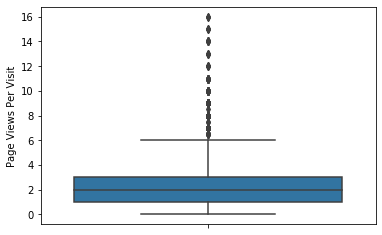

In [84]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

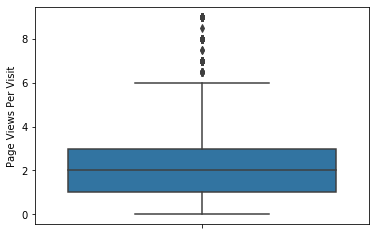

In [85]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [86]:
lead.shape

(8953, 14)

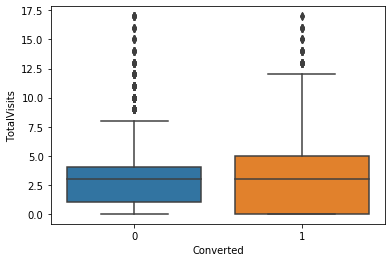

In [87]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

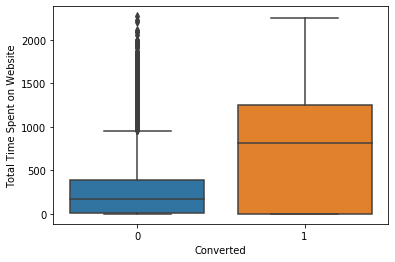

In [88]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

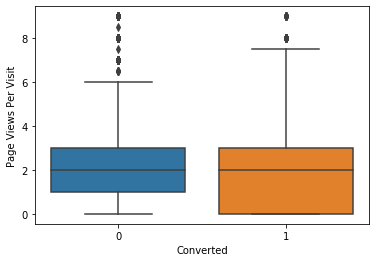

In [89]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

In [90]:

round(100*(lead.isnull().sum()/len(lead.index)),2)


Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [91]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [92]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [93]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead = pd.concat([lead,dummy],1)

In [94]:
dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [96]:
dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [99]:
#dropping the original columns after dummy variable creation

lead.drop(cat_cols,1,inplace = True)

In [100]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Train Test

In [101]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
TotalVisits                                             6267 non-null float64
Total Time Spent on Website                             6267 non-null int64
Page Views Per Visit                                    6267 non-null float64
Lead Origin_Landing Page Submission                     6267 non-null uint8
Lead Origin_Lead Add Form                               6267 non-null uint8
Lead Origin_Lead Import                                 6267 non-null uint8
What is your current occupation_Housewife               6267 non-null uint8
What is your current occupation_Other                   6267 non-null uint8
What is your current occupation_Student                 6267 non-null uint8
What is your current occupation_Unemployed              6267 non-null uint8
What is your current occupation_Working Professional    6267 non-null uint8
City_Other Cities                                 

In [104]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Model Building

In [105]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 30),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [108]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [110]:
#model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 24 May 2020   Deviance:                       2509.3
Time:                        12:32:13   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [111]:
#model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 24 May 2020   Deviance:                       2509.3
Time:                        12:32:13   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
#e VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,Last Notable Activity_SMS Sent,6.22
5,Last Activity_SMS Sent,6.13
1,Lead Origin_Lead Add Form,1.82
6,Last Notable Activity_Modified,1.69
14,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.39
4,Lead Source_Welingak Website,1.34
12,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
9,Tags_Closed by Horizzon,1.21


In [114]:
col = col.drop('Last Notable Activity_SMS Sent',1)

In [115]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.6
Date:                Sun, 24 May 2020   Deviance:                       2525.2
Time:                        12:32:13   Pearson chi2:                 8.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1049      0.084    -13.118      0.000      -1.270      -0.940
Total Time Spent on Website                       0.8903      0.053     16.927      0.000       0.787       0.993
Lead Origin_Lead Add Form                         1.6549      0.455      3.636      0.000       0.763       2.547
Lead Source_Direct Traffic                       -0.8307      0.127     -6.533      0.000      -1.080      -0.582
Lead Source_Referral Sites                       -0.5245      0.461     -1.137      0.256      -1.429       0.380
Lead Source_Welingak Website                      3.8826      1.114      3.485      0.000       1.699       6.066
Last Activity_SMS Sent                            1.9915      0.113     17.637      0.000       1.770       2.213
Last Notable Activity_Modified                   -1.6570      0.125    -13.308      0.000      -1.901      -1.413
Last Notable Activity_Olark Chat Conversation    -1.8068      0.492     -3.674      0.000      -2.771      -0.843
Tags_Closed by Horizzon                           7.1915      1.020      7.049      0.000       5.192       9.191
Tags_Interested in other courses                 -2.0957      0.404     -5.186      0.000      -2.888      -1.304
Tags_Lost to EINS                                 5.9137      0.611      9.681      0.000       4.716       7.111
Tags_Other_Tags                                  -2.3756      0.206    -11.516      0.000      -2.780      -1.971
Tags_Ringing                                     -3.4570      0.238    -14.544      0.000      -3.923      -2.991
Tags_Will revert after reading the email          4.5103      0.188     23.997      0.000       4.142       4.879
=================================================================================================================
"""

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Lead Add Form,1.82
13,Tags_Will revert after reading the email,1.56
5,Last Activity_SMS Sent,1.46
6,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
4,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21
12,Tags_Ringing,1.16


In [117]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


9196    0.283940
4696    0.031228
3274    0.578108
2164    0.006724
1667    0.989290
7024    0.132237
8018    0.024409
778     0.205844
6942    0.002694
4440    0.097005
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.28394007, 0.03122805, 0.57810769, 0.00672425, 0.98928958,
       0.13223674, 0.02440861, 0.20584354, 0.00269406, 0.0970052 ])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,1,0.283940,9196
1,0,0.031228,4696
2,0,0.578108,3274
3,0,0.006724,2164
4,1,0.989290,1667


In [120]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283940,9196,0
1,0,0.031228,4696,0
2,0,0.578108,3274,1
3,0,0.006724,2164,0
4,1,0.989290,1667,1


In [121]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 280 2105]]


In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9251635551300462


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8825995807127882

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9513137557959814

In [126]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04868624420401855


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.9176111595466434


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9295242889504153


Plotting ROC

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

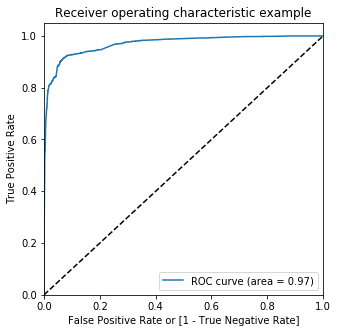

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283940,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031228,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.578108,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006724,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989290,1667,1,1,1,1,1,1,1,1,1,1,1


Optimal Cutoff

In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816499  0.970650  0.721793
0.2   0.2  0.901388  0.931656  0.882792
0.3   0.3  0.922610  0.916981  0.926069
0.4   0.4  0.926121  0.902306  0.940752
0.5   0.5  0.925164  0.882600  0.951314
0.6   0.6  0.915111  0.827254  0.969088
0.7   0.7  0.916068  0.809224  0.981710
0.8   0.8  0.906813  0.776101  0.987120
0.9   0.9  0.887027  0.718239  0.990726


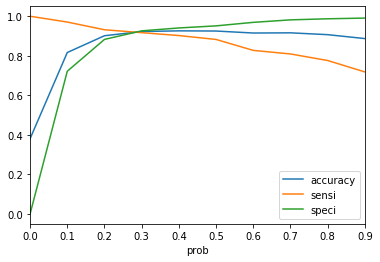

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [135]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283940,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031228,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.578108,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006724,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989290,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283940,9196,0,28
1,0,0.031228,4696,0,3
2,0,0.578108,3274,1,58
3,0,0.006724,2164,0,1
4,1,0.989290,1667,1,99


In [137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9226104994415191

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3595,  287],
       [ 198, 2187]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.9260690365790829

In [142]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07393096342091705


In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8839935327405012


In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9477985763248089


In [145]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3595,  287],
       [ 198, 2187]], dtype=int64)

In [146]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8839935327405012

In [147]:
##### Recall
TP / TP + FN

199.0

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8839935327405012

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

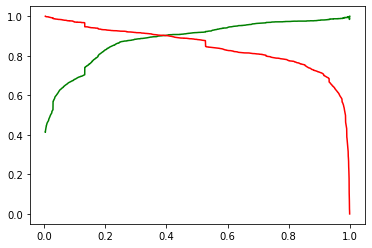

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [154]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [155]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,0,1


In [156]:
X_test_sm = sm.add_constant(X_test)

Prediction Test

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

7681    0.024646
984     0.025684
8135    0.685519
6915    0.005932
2712    0.953922
244     0.002410
4698    0.014851
8287    0.027763
6791    0.981910
8970    0.005961
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [160]:
# Let's see the head
y_pred_1.head()

,0
7681,0.024646
984,0.025684
8135,0.685519
6915,0.005932
2712,0.953922


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024646
1,0,984,0.025684
2,0,8135,0.685519
3,0,6915,0.005932
4,1,2712,0.953922


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [167]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024646
1,0,984,0.025684
2,0,8135,0.685519
3,0,6915,0.005932
4,1,2712,0.953922


In [168]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024646,2
1,984,0,0.025684,3
2,8135,0,0.685519,69
3,6915,0,0.005932,1
4,2712,1,0.953922,95


In [170]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [171]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024646,2,0
1,984,0,0.025684,3,0
2,8135,0,0.685519,69,1
3,6915,0,0.005932,1,0
4,2712,1,0.953922,95,1


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)



0.9277736411020104

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [175]:
# Let us calculate specificity
TN / float(TN+FP)


0.9325775656324582

In [176]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.8915547024952015

In [177]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

# Plotting Decision Tree

In [178]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3109,5.0,2,2.5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3348,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5039,2.0,74,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2277,2.0,559,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
270,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [180]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(lead.columns[1:])
features

C:\Users\M.sailaja\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts',
 'City_Tier II Cities',
 'Specialization_Banking, Investment And Insurance',
 'Specialization_Business Administration',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_International Business',
 'Specialization_Management_Specializations',
 'Specialization_Media and Advertising',
 'Specialization_Rural and Agribusiness',
 'Specialization_Services Excellence',
 'Specialization_Travel and Tourism',
 'Lead Source_Direct Traffic',
 'Lead Source_Google

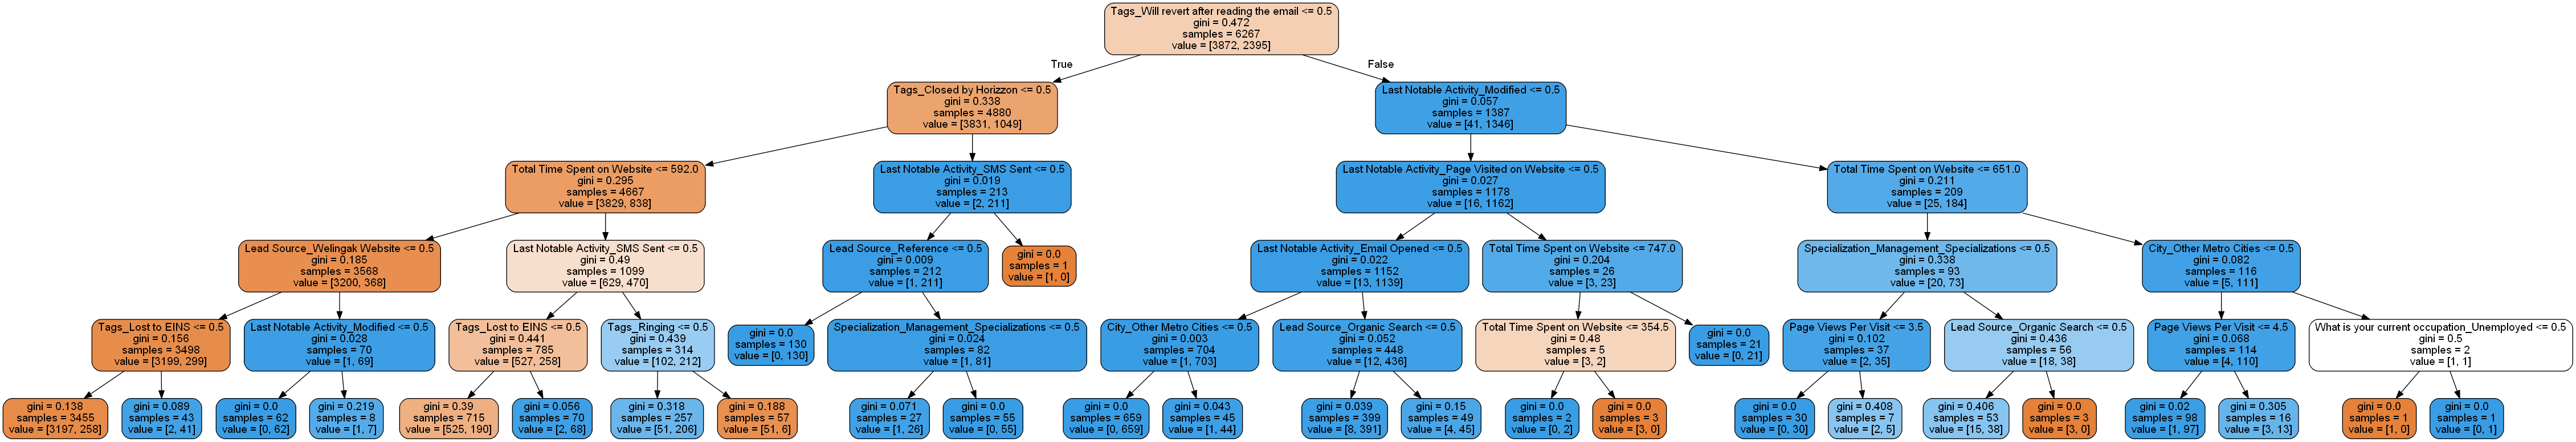

In [181]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Hyperparameter Tunning

In [182]:
#The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 
#criterion
#splitter
#max_features
#max_depth
#min_samples_split
#min_sapmles_leaf
#max_leaf_nodes
#min_impurity_split

Tuning max_depth

In [185]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,return_train_score=True,scoring ="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [186]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029237,0.028061,0.006263,7.047490e-03,1,{'max_depth': 1},0.821372,0.824561,0.821229,0.831604,...,0.826073,0.004670,39,0.827249,0.826451,0.827284,0.824691,0.824691,0.826073,0.001167
1,0.020345,0.000489,0.002794,3.988029e-04,2,{'max_depth': 2},0.856459,0.853270,0.860335,0.860335,...,0.859422,0.004507,37,0.860164,0.860962,0.859194,0.859194,0.857599,0.859422,0.001127
2,0.024549,0.000470,0.002977,3.147234e-05,3,{'max_depth': 3},0.856459,0.853270,0.860335,0.860335,...,0.859422,0.004507,37,0.860363,0.861161,0.859394,0.859394,0.857599,0.859582,0.001192
3,0.029320,0.000489,0.002395,4.884031e-04,4,{'max_depth': 4},0.877193,0.879585,0.883480,0.868316,...,0.873464,0.008887,36,0.890684,0.890485,0.888113,0.870762,0.870562,0.882121,0.009400
4,0.032512,0.000489,0.002993,3.162980e-07,5,{'max_depth': 5},0.908293,0.897129,0.905826,0.892259,...,0.899314,0.006584,16,0.914024,0.916218,0.914838,0.900080,0.900479,0.909128,0.007260


In [187]:
#now lets visualize how tarin and test score changes with max_depth

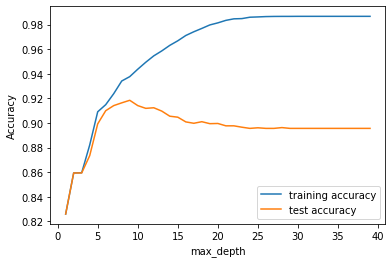

In [188]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min sample splits

In [190]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True,scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [191]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061707,0.019265,0.004394,2.505140e-03,5,{'min_samples_leaf': 5},0.904306,0.913876,0.924182,0.915403,...,0.915270,0.006522,2,0.947935,0.947137,0.946350,0.946749,0.946550,0.946944,0.000560
1,0.051062,0.001163,0.002993,3.568323e-07,25,{'min_samples_leaf': 25},0.916268,0.919458,0.921788,0.924182,...,0.922132,0.004304,1,0.933174,0.931977,0.929398,0.932988,0.933187,0.932145,0.001444
2,0.047481,0.003761,0.003069,1.538388e-04,45,{'min_samples_leaf': 45},0.892344,0.892344,0.914605,0.922586,...,0.909047,0.013984,3,0.909236,0.909635,0.917232,0.921420,0.921619,0.915828,0.005451
3,0.044918,0.001709,0.002971,6.560669e-05,65,{'min_samples_leaf': 65},0.883573,0.881978,0.897845,0.898643,...,0.892612,0.008119,4,0.900658,0.899860,0.899083,0.906861,0.907260,0.902744,0.003561
4,0.035508,0.004730,0.002412,5.051831e-04,85,{'min_samples_leaf': 85},0.876396,0.875598,0.893855,0.898643,...,0.889102,0.010954,5,0.896469,0.896270,0.894894,0.906861,0.907260,0.900351,0.005507


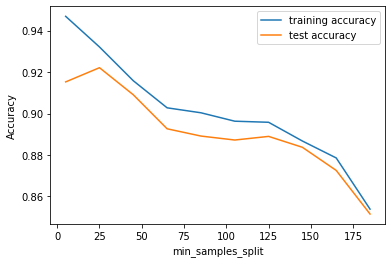

In [193]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Grid search to find optimal hyperparameters

In [194]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [195]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045070,0.010979,0.004790,0.001598,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.889155,0.880383,0.892259,0.886672,0.889066,0.887506,0.003980,11
1,0.032513,0.002327,0.002993,0.000630,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.889155,0.880383,0.892259,0.886672,0.889066,0.887506,0.003980,11
2,0.032120,0.000396,0.003189,0.000401,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.880383,0.878788,0.893855,0.883480,0.889864,0.885272,0.005726,13
3,0.032904,0.000014,0.002994,0.000001,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.880383,0.878788,0.893855,0.883480,0.889864,0.885272,0.005726,13
4,0.044892,0.000631,0.003179,0.000406,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.895534,0.900319,0.906624,0.910615,0.918595,0.906335,0.008020,3
5,0.047672,0.003701,0.003192,0.000398,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.895534,0.900319,0.906624,0.910615,0.918595,0.906335,0.008020,3
6,0.041093,0.001583,0.003188,0.000401,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.870813,0.885965,0.898643,0.903432,0.899441,0.891655,0.011959,5
7,0.040944,0.000982,0.002943,0.000108,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.870813,0.885965,0.898643,0.903432,0.899441,0.891655,0.011959,5
8,0.032695,0.000407,0.003006,0.000022,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889155,0.889155,0.893855,0.886672,0.889066,0.889580,0.002339,7
9,0.032695,0.001686,0.002987,0.000004,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.889155,0.889155,0.893855,0.886672,0.889066,0.889580,0.002339,7


In [196]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.906813467368757
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Running the best model with best parameter obtained from grid search

In [197]:
#model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [198]:
# accuracy score
clf_gini.score(X_test,y_test)

0.922933730454207

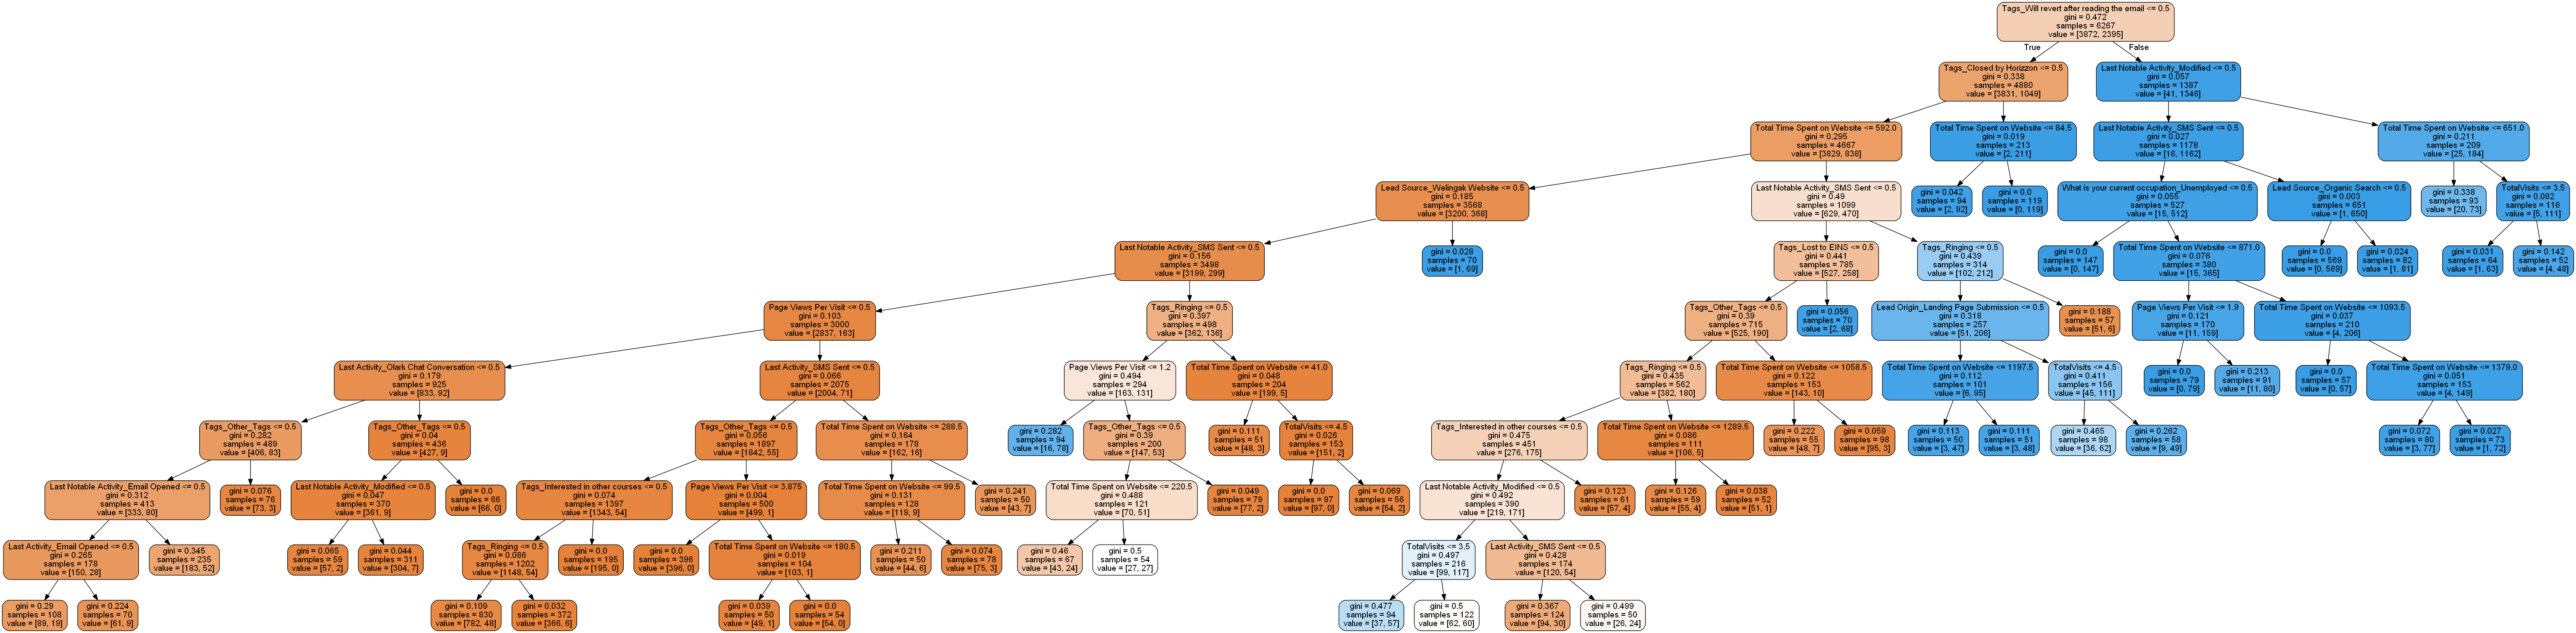

In [199]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.¶

In [200]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8726731198808637


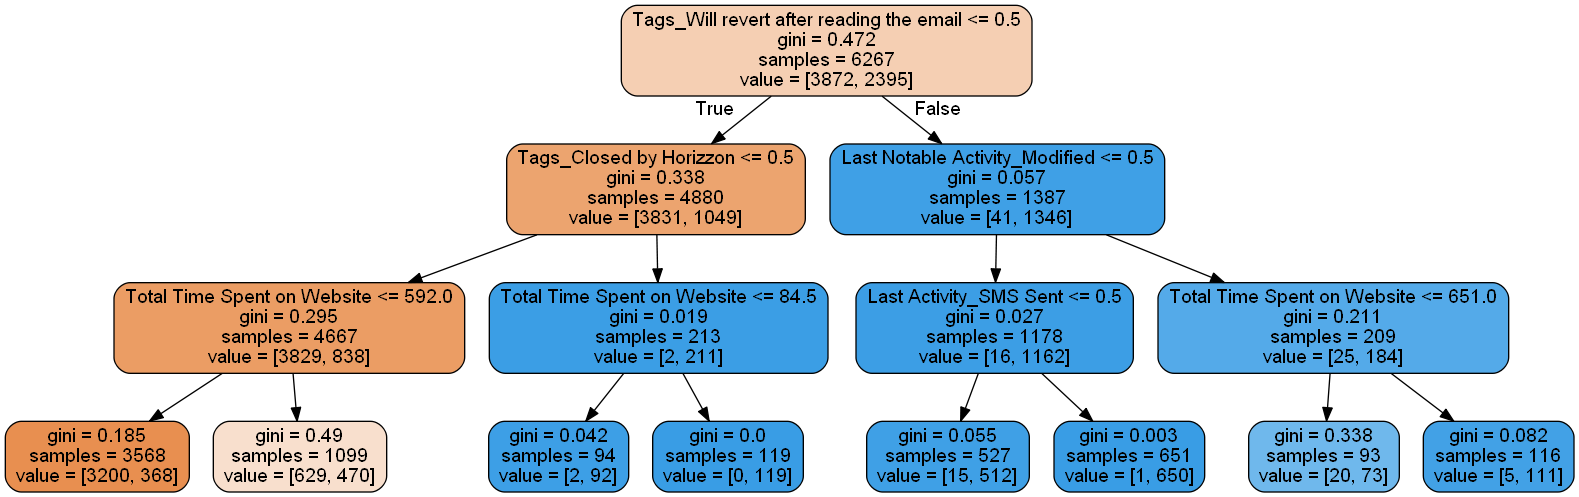

In [201]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [202]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))
              

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1686
           1       0.98      0.68      0.80      1000

    accuracy                           0.87      2686
   macro avg       0.91      0.83      0.85      2686
weighted avg       0.89      0.87      0.87      2686



In [203]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1669   17]
 [ 325  675]]


# Random Forest

In [204]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [205]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [206]:
# Making predictions
predictions = rfc.predict(X_test)

In [207]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [208]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1686
           1       0.92      0.88      0.90      1000

    accuracy                           0.93      2686
   macro avg       0.93      0.92      0.92      2686
weighted avg       0.93      0.93      0.93      2686



In [209]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[1613   73]
 [ 120  880]]


In [210]:
print(accuracy_score(y_test,predictions))

0.9281459419210722


Hyperparameters

Tuning max depths

In [214]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036569,0.004726,0.005317,0.000778,2,{'max_depth': 2},0.841308,0.783892,0.818835,0.838787,...,0.808521,0.031874,4,0.845202,0.794933,0.824093,0.832070,0.763861,0.812032,0.029189
1,0.066422,0.005264,0.006871,0.000459,7,{'max_depth': 7},0.919458,0.917065,0.908220,0.923384,...,0.915270,0.006098,3,0.925394,0.923399,0.919625,0.916833,0.904866,0.918023,0.007215
2,0.081974,0.005500,0.008187,0.000395,12,{'max_depth': 12},0.921053,0.921053,0.917797,0.929769,...,0.921653,0.004261,1,0.948933,0.947337,0.939968,0.938771,0.942960,0.943594,0.003983
3,0.102880,0.013215,0.008578,0.000489,17,{'max_depth': 17},0.915470,0.918660,0.920990,0.925778,...,0.920696,0.003491,2,0.966288,0.962498,0.964898,0.960710,0.963303,0.963539,0.001926


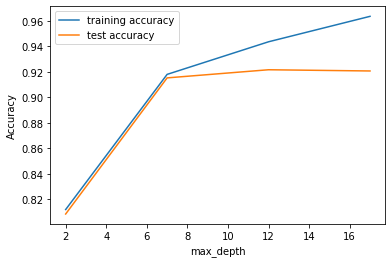

In [216]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning n Estimates

In [217]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [218]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.406715,0.011053,0.032118,0.002905,100,{'n_estimators': 100},0.894737,0.892344,0.884278,0.907422,...,0.896282,0.008079,3,0.897866,0.899661,0.895094,0.901077,0.895892,0.897918,0.002241
1,2.528350,0.243677,0.163566,0.010774,500,{'n_estimators': 500},0.897129,0.893142,0.887470,0.903432,...,0.895963,0.005374,4,0.896669,0.898663,0.897088,0.896091,0.894495,0.896601,0.001356
2,4.205183,0.249878,0.298724,0.033591,900,{'n_estimators': 900},0.893142,0.893939,0.889864,0.902634,...,0.896442,0.005236,2,0.897267,0.901257,0.900479,0.896689,0.896091,0.898357,0.002098
3,6.643712,0.695163,0.562977,0.142671,1300,{'n_estimators': 1300},0.895534,0.893142,0.888268,0.908220,...,0.897559,0.007061,1,0.898065,0.900259,0.897686,0.899083,0.895892,0.898197,0.001458


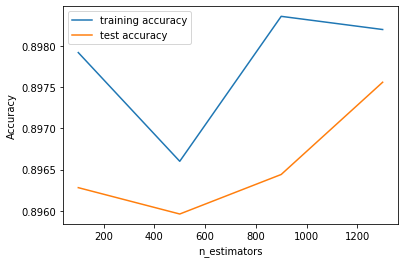

In [219]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning  max features

In [220]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [221]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046681,0.006504,0.006383,0.000476,4,{'max_features': 4},0.881180,0.878788,0.872306,0.853152,...,0.868039,0.011872,5,0.883702,0.885697,0.876346,0.854607,0.860989,0.872268,0.012384
1,0.052658,0.001716,0.006384,0.000489,8,{'max_features': 8},0.886762,0.901116,0.833998,0.893855,...,0.879209,0.023648,4,0.887094,0.908638,0.827682,0.878740,0.877742,0.875979,0.026583
2,0.064234,0.000804,0.006183,0.000400,14,{'max_features': 14},0.905901,0.892344,0.906624,0.905028,...,0.904420,0.006542,2,0.893078,0.896868,0.913642,0.901476,0.904069,0.901826,0.007012
3,0.077194,0.001019,0.011269,0.010098,20,{'max_features': 20},0.897129,0.891547,0.918595,0.916201,...,0.907611,0.011058,1,0.908438,0.895073,0.924811,0.910850,0.906661,0.909166,0.009518
4,0.084195,0.003722,0.006570,0.000479,24,{'max_features': 24},0.895534,0.896332,0.894653,0.908220,...,0.900910,0.006659,3,0.906643,0.902055,0.902274,0.897288,0.905066,0.902665,0.003195


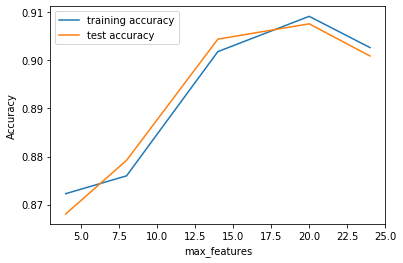

In [222]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min samples leaf

In [223]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [224]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057441,0.008981,0.006402,0.001329,100,{'min_samples_leaf': 100},0.866826,0.867624,0.866720,0.899441,...,0.873783,0.012840,1,0.869140,0.873130,0.880535,0.877942,0.866773,0.873504,0.005169
1,0.052838,0.001403,0.006583,0.000489,150,{'min_samples_leaf': 150},0.866826,0.846890,0.851556,0.894653,...,0.858305,0.021363,2,0.877119,0.852384,0.861986,0.880535,0.827483,0.859901,0.019152
2,0.053457,0.000488,0.006384,0.000489,200,{'min_samples_leaf': 200},0.829346,0.830144,0.841181,0.863528,...,0.828467,0.028024,5,0.834430,0.832635,0.859194,0.845433,0.786598,0.831658,0.024442
3,0.049252,0.003430,0.006384,0.000798,250,{'min_samples_leaf': 250},0.844498,0.818182,0.838787,0.867518,...,0.848412,0.019983,3,0.854379,0.824057,0.852014,0.842242,0.866972,0.847933,0.014305
4,0.045877,0.001995,0.006184,0.000399,300,{'min_samples_leaf': 300},0.801435,0.845295,0.839585,0.867518,...,0.841391,0.022074,4,0.807102,0.845402,0.847427,0.849422,0.851815,0.840233,0.016702


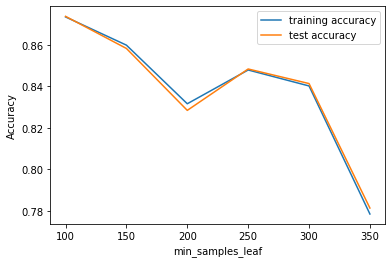

In [225]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min samples split

In [226]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [227]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069024,0.007395,0.006987,0.000632,200,{'min_samples_split': 200},0.921850,0.908293,0.920990,0.923384,...,0.920057,0.006104,1,0.921205,0.920606,0.919824,0.923215,0.919426,0.920855,0.001331
1,0.067213,0.001020,0.006989,0.000018,250,{'min_samples_split': 250},0.914673,0.912281,0.913807,0.928970,...,0.918302,0.006254,3,0.921205,0.917415,0.920822,0.924013,0.926406,0.921972,0.003050
2,0.065416,0.001624,0.007581,0.000798,300,{'min_samples_split': 300},0.915470,0.910686,0.921788,0.910615,...,0.917026,0.006286,4,0.919410,0.922801,0.926207,0.902673,0.925608,0.919340,0.008674
3,0.065433,0.002876,0.006983,0.000002,350,{'min_samples_split': 350},0.909888,0.922648,0.914605,0.922586,...,0.920057,0.007165,1,0.923399,0.922402,0.915038,0.919625,0.926207,0.921334,0.003787
4,0.061036,0.000745,0.006982,0.000001,400,{'min_samples_split': 400},0.914673,0.903509,0.913807,0.926576,...,0.916707,0.008398,5,0.923998,0.911630,0.921619,0.920423,0.919027,0.919339,0.004186


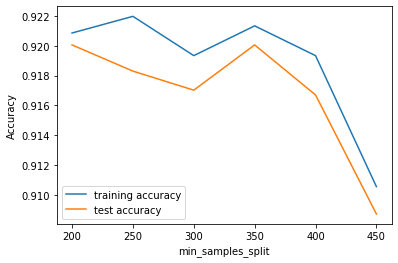

In [228]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grid search to find optimal hyperparameters

In [229]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [230]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [231]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8774533269506941 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


Fitting the final model with best parameters obtained from grid search

In [232]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [233]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
# predict
predictions = rfc.predict(X_test)

In [235]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [236]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1686
           1       0.94      0.80      0.86      1000

    accuracy                           0.91      2686
   macro avg       0.91      0.88      0.90      2686
weighted avg       0.91      0.91      0.90      2686



In [237]:
print(confusion_matrix(y_test,predictions))

[[1631   55]
 [ 200  800]]
